In [1]:
## Maddie Schwarz, Mindy Zuckerman, Hafiz Abdel, Aswayuja Koduri 
#4/21/2022  SES 598 Autonomous Exploration Systems

from osgeo import gdal, gdal_array
from osgeo import osr
import pandas as pd

import subprocess
import os

import numpy as np
import matplotlib.pyplot as plt

from osgeo import ogr
import geopandas as gpd 
from shapely.geometry import shape, Polygon
from centerline.geometry import Centerline

In [2]:
import pandas as pd

import subprocess
import os

import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd 
from shapely.geometry import shape, Polygon
from centerline.geometry import Centerline

In [3]:
shapefile_name = "b1m_g30_KM2_poly.shp"

In [4]:
# Read the fault zone shapefile (a multi-polygon) using geopandas
# Display the attributes table

shapefile = gpd.read_file(shapefile_name)
print(shapefile)

    DN    Area                                           geometry
0  1.0  5518.0  POLYGON ((13.083 62.797, 16.083 62.797, 16.083...
1  0.0     NaN  POLYGON ((-52.917 65.797, 100.083 65.797, 100....


In [5]:
shapefile.geom_type

0    Polygon
1    Polygon
dtype: object

In [6]:
# extract row containing scarp polygon from df
# https://stackoverflow.com/questions/46307490/how-can-i-extract-the-nth-row-of-a-pandas-data-frame-as-a-pandas-data-frame

scarp = shapefile.iloc[[0]]
scarp
#scarp.geom_type

,DN,Area,geometry
0,1.0,5518.0,"POLYGON ((13.08260 62.79707, 16.08260 62.79707..."


In [7]:
# save just the scarp as a new polygon shapefile
scarp.to_file('b1m_scarp_poly.shp')

C:\Users\abdel\anaconda3\envs\geo_env\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [8]:
scarp_shp = gpd.read_file("b1m_scarp_poly.shp")

scarp_geom = scarp['geometry']
scarp_geom
#type(scarp_geom)

0    POLYGON ((13.08260 62.79707, 16.08260 62.79707...
Name: geometry, dtype: geometry

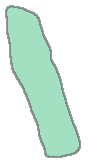

In [9]:
# access the shapely object stored in the geopandas datafram ('geometry' column)
# https://gis.stackexchange.com/questions/404299/how-to-convert-string-type-to-shapely-object

in_polygon = scarp_shp.geometry[0] 
in_polygon

In [10]:
# Check the data type of the polygon -- needs to be 'shapely' to input into centerline class
type(in_polygon)

shapely.geometry.polygon.Polygon

In [11]:
# get polygon coordinates
# upper edge of polygon is start: (15.667686462402344, 83.42528533935547)
# end:(60.667686462402344, -67.57471466064453),
in_polygon.exterior.coords[:-1]

[(13.082595353027003, 62.797073323242),
 (16.082595353027003, 62.797073323242),
 (16.082595353027003, 61.797073323242),
 (22.082595353027003, 61.797073323242),
 (22.082595353027003, 60.797073323242),
 (26.082595353027003, 60.797073323242),
 (26.082595353027003, 59.797073323242),
 (28.082595353027003, 59.797073323242),
 (28.082595353027003, 58.797073323242),
 (30.082595353027003, 58.797073323242),
 (30.082595353027003, 57.797073323242),
 (33.082595353027, 57.797073323242),
 (33.082595353027, 56.797073323242),
 (35.082595353027, 56.797073323242),
 (35.082595353027, 55.797073323242),
 (37.082595353027, 55.797073323242),
 (37.082595353027, 54.797073323242),
 (38.082595353027, 54.797073323242),
 (38.082595353027, 53.797073323242),
 (40.082595353027, 53.797073323242),
 (40.082595353027, 51.797073323242),
 (41.082595353027, 51.797073323242),
 (41.082595353027, 50.797073323242),
 (42.082595353027, 50.797073323242),
 (42.082595353027, 47.797073323242),
 (43.082595353027, 47.797073323242),
 (43.

C:\Users\abdel\anaconda3\envs\geo_env\lib\site-packages\centerline\geometry.py:34: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  self._input_geometry = input_geometry
C:\Users\abdel\anaconda3\envs\geo_env\lib\site-packages\centerline\geometry.py:35: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  self._interpolation_distance = abs(interpolation_distance)
C:\Users\abdel\anaconda3\envs\geo_env\lib\site-packages\centerline\geometry.py:40: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  self._min_x, self._min_y = self._get_reduced_coordinates()


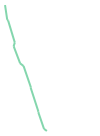

In [12]:
# compute centerline of scarp using centerline class 
# 2nd param is the interpolation distance

centerline = Centerline(in_polygon, 31)
centerline

In [13]:
# returns a multi-linestring
centerline.geom_type

'MultiLineString'

In [14]:
#list(centerline)

In [15]:
# Iterate through the multi-linestring to get the coordinates of each point
wpts_list = [list(x.coords) for x in list(centerline)]
wpts_list

C:\Users\abdel\AppData\Local\Temp\ipykernel_31848\1953818374.py:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  wpts_list = [list(x.coords) for x in list(centerline)]
C:\Users\abdel\AppData\Local\Temp\ipykernel_31848\1953818374.py:2: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  wpts_list = [list(x.coords) for x in list(centerline)]


[[(65.4078380714736, -71.97477133695217),
  (62.521526650736924, -69.85814296174527)],
 [(62.521526650736924, -69.85814296174527),
  (56.803374573806224, -53.18019940403072)],
 [(56.803374573806224, -53.18019940403072),
  (56.95156087026838, -52.66154736641317)],
 [(49.36181613224778, -28.22565394948527),
  (49.213629835785625, -28.744305987102827)],
 [(49.36181613224778, -28.22565394948527),
  (42.0700668792229, -6.958051961496039)],
 [(42.0700668792229, -6.958051961496039),
  (38.66760653870933, -4.3561705246327165)],
 [(56.95156087026838, -52.66154736641317),
  (49.213629835785625, -28.744305987102827)],
 [(32.165533741652595, 12.827879010445798),
  (33.31918653300316, 16.46632242932067)],
 [(33.31918653300316, 16.46632242932067),
  (26.592399274595632, 38.664720382065525)],
 [(25.72842868636033, 39.31269832324199),
  (26.592399274595632, 38.664720382065525)],
 [(38.66760653870933, -4.3561705246327165),
  (32.165533741652595, 12.827879010445798)],
 [(23.547507633728756, 54.033915428

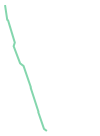

In [16]:
# merge into 1 linestring
from shapely.ops import linemerge
merged = linemerge(centerline)
merged

In [17]:
merged.geom_type

'LineString'

In [18]:
x,y = merged.coords.xy
data = list(zip(x,y))
print(data)

[(65.4078380714736, -71.97477133695217), (62.521526650736924, -69.85814296174527), (56.803374573806224, -53.18019940403072), (56.95156087026838, -52.66154736641317), (49.213629835785625, -28.744305987102827), (49.36181613224778, -28.22565394948527), (42.0700668792229, -6.958051961496039), (38.66760653870933, -4.3561705246327165), (32.165533741652595, 12.827879010445798), (33.31918653300316, 16.46632242932067), (26.592399274595632, 38.664720382065525), (25.72842868636033, 39.31269832324199), (23.547507633728756, 54.03391542850514)]


In [19]:
waypoints = []
for i in range(1,len(data)-1,2):
    waypoints.append(data[i])
print(waypoints)

[(62.521526650736924, -69.85814296174527), (56.95156087026838, -52.66154736641317), (49.36181613224778, -28.22565394948527), (38.66760653870933, -4.3561705246327165), (33.31918653300316, 16.46632242932067), (25.72842868636033, 39.31269832324199)]


In [20]:
#Get coordinates of the final linestring
df = pd.DataFrame((waypoints), columns=['x', 'y'])
df

,x,y
0,62.521527,-69.858143
1,56.951561,-52.661547
2,49.361816,-28.225654
3,38.667607,-4.356171
4,33.319187,16.466322
5,25.728429,39.312698


In [21]:
#Export as csv
df.to_csv('waypoints.csv', index=False)

In [22]:
#Export as shapefile
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y))
gdf.to_file("waypoints.shp")

C:\Users\abdel\anaconda3\envs\geo_env\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
